In [1]:
from IPython.display import Image

In the old days, institutions didn't have one computer per person, people had to share. Contrary to what happens nowadays — where the typical computer has one screen, one keyboard and one mouse — a computer would have numerous terminals located throughout the [premises](https://en.wikipedia.org/wiki/Computer_terminal). People would use the same computer simultaneously through these terminals.

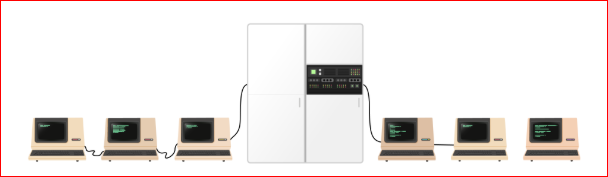

In order to protect the integrity of the computer and to protect users from each other, the concept of user arose. Each user has their own set of permissions (actions that the user is allowed to perform). Every action, performed in a *nix system, is done by a user.

Before we learn more about permissions, let's see what information the shell gives us about users. In the examples used, the command prompt has been /home/learn$, which suggests that the user is learn. We can verify this with the help of the command **whoami**.

The result of this command does not depend on the directory the user is located in.

whoami is the same as **id -un**. id is another command that lets us know what user is logged in and active.

The output of id was much more verbose than that of whoami. In addition to the identification of the user, it also includes information about what groups the user belongs to. Groups are a mechanism used to facilitate granting and revoking permissions from users.

Take for instance companies that employ a large number of people. It would be extremely cumbersome to manually define what level of access each new employee should have. Instead, these permissions are defined for groups of people (possibly as a function of what team they belong to). Whenever someone new joins, a [system administrator](https://en.wikipedia.org/wiki/System_administrator) just has to assign the new employee to the appropriate group and the right permissions will be automatically set.

Now that we understand what groups are and what they are for, let us breakdown the output.

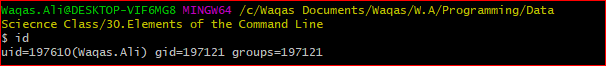

The output is space separated and we have three fields:

* uid=197610(Waqas.Ali)
 * uid stands for User ID (UID). The UID is a unique number assigned to each user, in this case it is 197610.
 * For the sake of human intelligibility, a name (Waqas.Ali) is associated to this UID.
 
* gid=197121
 * gid stands for Group ID. This field tells us what the id and name of the primary group are. 
 * The rest of the information is analogous to that of the UID.
 
* groups=197121
 * This field simply lists all the groups to which the user belongs, with their IDs and their names.

If we wish to see what groups our user belongs to, without any aditional information, we can run the command groups.

In the table below, we're looking at part of the output of the above exercise

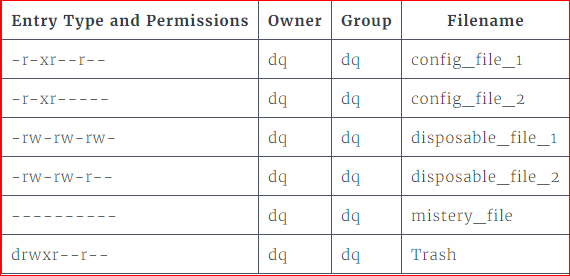

We have established that every action in a *nix system is associated with a user. In addition to this, every file and directory must have an owner. When a user creates a file or directory, ownership is attributed to the user who created it. The Owner column tells us who the owner of the file/directory is. There's also group ownership.

The column Group tells us what group owns the file. By default the group ownership is given to the primary group of the user who created the file. A primary group is simply a group that is associated with a user. It will typically have the same name and unique number than that of the user.

There is a maxim in Unix-like systems that says ["everything is a file"](https://en.wikipedia.org/wiki/Everything_is_a_file). This isn't exactly true, but the details that allow us to understand the nuances are not relevant in Data Science. We will accept this maxim as is from now on, making the appropriate distinctions when necessary.

Since everything is a file, directories are files, too. The first character of the values in the first column tell us what kind of file it is. Most of the time, we'll only encounter the values -, d, and l, which tell us, respectively, that the file is a regular file, a directory, and a [symbolic link](https://pubs.opengroup.org/onlinepubs/9699919799/basedefs/V1_chap03.html#tag_03_381)

We may have occasionally experienced an error message when trying to access a directory — this is due to permissions. Permissions are the mechanism that [multi-user systems](https://www.computerhope.com/jargon/m/multsyst.htm) use to not have users wreak havoc. These permissions are the remaining characters of the first column in the table above. 

We learned that permissions are the characters in the first column other than the first. We will now dive deeper into this.

Since everything is a file, by defining permissions on files, we can define permissions for everything. Permissions have three scopes: there are permissions for the owner, for the owner group, and for everyone else. Therefore, we can look at the files in our home directory in this way:

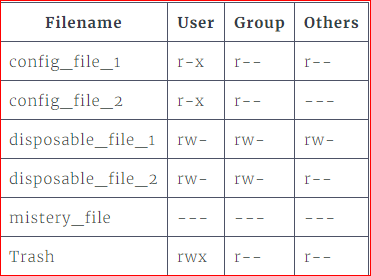

For each scope, permissions are defined by a sequence of three characters called file access modes. They are, in order, the read mode, the write mode and the execute mode. Each of these entries accepts only certain characters as values, and each of these characters has its own effect.

The various possibilities and what they mean are in the table below. The last four rows are only present for reference as their function is of little relevance for Data Science

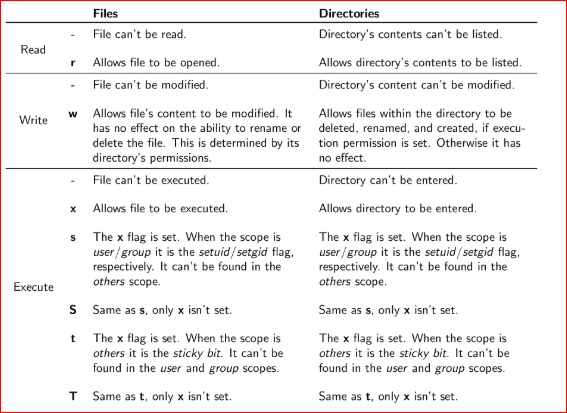

The execution mode for files might seem a little bit alien, so here's how we can understand it. Some files are programs, therefore having execute permissions on files allows us to execute them (with the aforementioned caveat).

Another important caveat is this: the execution permissions are hereditary. A corollary of this is that if an ancestor doesn't have execution permissions, none of its descendants will either, regardless of whether the x bit is set or not.

For example, say the permissions of the directory parent_dir/child_dir are rwxrwxrwx and the permissions of parent_dir are rwxrwx---, then users in the others scope won't be able to enter parent_dir/child_dir, despite having the x bit enabled for this directory.

Since each character in the file permissions string says that the given permission is either enabled or disabled, it's common to call them bits (due to the on/off, 1/0, True/False duality).

# Change Permission

There are many situations in which we'll want to change permissions. Maybe we don't want to risk deleting or overwritting the contents of a file, so we protect it from ourselves by removing permissions adequately. Maybe we want another user to be able to access some of our files. Permissions can be changed by users with sufficient privileges (e.g. file owners). We can change the permissions of files with the chmod (change mode) command. Usage of this command typically looks like this:

**chmod permissions files**

The permissions argument can have many different looks. 

In the symbolic notation, this argument can be divided into three components:

* Scope: owner/user (u), group (g), others (o), all (a – this references all scopes simultaneously)
* Operator: add (+), remove (-), set (=)
* Mode: read (r), write (w), execute (x)

With this context, we can now rewrite the command above as:

chmod [ugoa][+-=][rwx] files

It is now worth quoting from the documentation:

The operator + causes the selected file mode bits to be added to the existing file mode bits of each file; - causes them to be removed; and = causes them to be added and causes unmentioned bits to be removed.

In the table below, We can find a few usage examples. The file upon which the commands act upon is ommitted. For an explicit example, we can read the first row as: my_file had permissions rw-rw-r--, before running chmod u+x my_file, and it ended up with permissions rwxrw-r-- after running it.

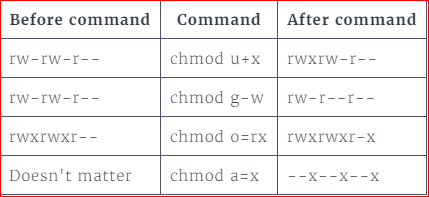

We can also simultaneously set permissions for several scopes. To set all permissions for the owner, read and execute permissions for the group, and read permissions for all other users, we can run chmod u=rwx,g=rx,o=r my_file. The permissions argument is comma-separated — including spaces will cause an error. The order of the modes doesn't matter. Here are a few more examples:

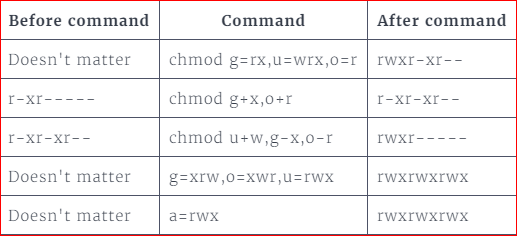

The commands in the last two rows are equivalent, they do exactly the same thing.

chmod is very flexible, there are many syntax variations that make it work.

We're going to briefly mention a couple more features of this command:

* As with most commands we've learned, we can use chmod on more than one file and even use wildcards. For instance, chmod g+r * would ensure that all files have the read mode enabled for the owner group.
* It also allows us to copy permissions from one scope to another. Let's say we'd like to give to the group scope of my_file the same permissions that the user scope has. This can be achieved with chmod g=u my_file. We just use the source scope in place of the permissions.

# File status

We have learned to see a file's permissions by using the long format option of ls. We'll now learn about the command stat (file status). Below we see the result of running stat west.

This command gives us a lot of information. We'll focus on the first line that starts with "Access":

We can readily identify:

* The permissions of the file west.
* The UID and the username.
* The GID and the group's name.

Right next to the permissions, we see the sequence of numbers 0644. This is a numeric codification of permissions, one that allows to convey the same information using fewer characters.

As we know, computers think in bits. The symbolic notation we learned is merely a human convenience. Also, for the sake of humans, there is a numeric notation that codifies into numbers the symbolic notation. Its main advantage is that it allows us to express the same things with less symbols, which makes it easier to type and parse.

For each scope, each of the file access modes can either be enabled or disabled. Since there are three of them, a little combinatorics (a branch of mathematics concerned with counting) tells us that for each scope we have eight possibilities (2x2x2). We can list them: ---, --x, -w-, -wx, r--, r-x, rw-, and rwx.

Given that we have eight possibilities for each scope, if we number them from 0 to 7, we are able to reduce from three characters to one. This is exactly what we do. Here's how we map from each of these possibilities to a number:

* ---:0 (no permissions)
* --x:1 (execute only permission)
* -w-:2 (write only permissions)
* -wx:3 (write and execute permissions)
* r--:4 (read only permissions)
* r-x:5 (read and execute permissions)
* rw-:6 (read and write permissions)
* rwx:7 (read, write, and execute permissions)

Recall the relevant part of the output of running stat west:

/home/learn$ stat west

Access: (0644/-rw-r--r--)  Uid: ( 1000/   learn)   Gid: ( 1000/   learn)
            
We now see where 644 in 0644 comes from. The first digit, in this case 0, concerns the special permissions (s, S, t, T) that we learned

The remaining ones pertain, in order, to:

* The permissions of the owner: rw-::6
* The permissions of the group: r--::4
* The permissions of others: r--:4.

Octal notation can also be used to change permissions of files with chmod. It works in almost the same way as setting permissions with the symbolic notation, the only big difference is that with the octal notation we need to set permissions for every scope. A convenient feature is that the leading special digit is optional, so for instance, to set permissions rwxrwxrwx on my_file, we can run chmod 777 my_file.

# Superuser

Earlier we tried (and failed) to create a directory at the root of the filesystem. It resulted in a "permission denied" message. Some files in the Unix filesystem are crucial to have the system running, for this reason access to certain files is very limited. There is, however, a user that has full access to all files and commands: the root user. The root user is the owner of the directory /root, this is the root's home directory. It is a user just like Waqas.ALi, only it has special privileges and its UID is 0 (this is in fact what defines it as the root user, the name root is just a convention). On Windows, the corresponding user is called an **administrator**. The general cross-platform term for this concept is **[superuser](https://en.wikipedia.org/wiki/Superuser)**.

The root user is so powerful that it is a bad practice to login as the root user for regular tasks. The main reason is security. For example, if we are logged in as the root user, we risk there being a bug that makes a program delete important system files. This can be prevented by not allowing the program to run as root. We shouldn't be logged in as root unless it is strictly necessary, in order to minimize the window of opportunity for bugs to occur and vulnerabilities to be exploited.

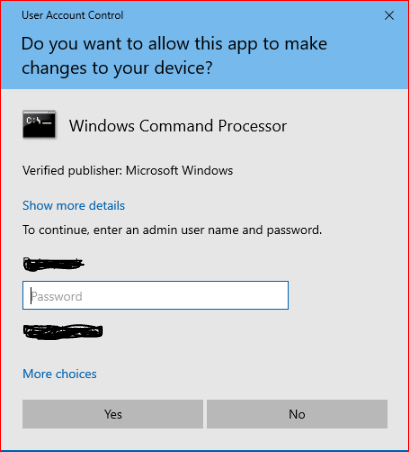

The alternative is to comply with the principle of least privilege which says that access should be restricted to the minimum necessary. However, users sometimes need elevated privileges to perform certain tasks. We may have experienced this need on Windows, wanting to run a program and Windows asking us for administrator access. Inserting the right password and answering yes to the prompt above will elevate the current user's (who happens to be a guest) permissions momentarily to be able to run the program.

The shell offers us a similar solution by means of the sudo command (superuser or substitute user do). This command allows us to run commands as if we were other users. If for some reason we wanted to run a command with vik's permissions, we could run sudo -u vik <command>. To use the command to gain root privileges it's enough to run sudo <command>.

In the gif below, we see the user learn:

* Trying to create a directory called oops in / and failing due to lack of permissions;
* Running the same command with superuser privileges. In sudo <command>, mkdir /oops takes the place of <command>.
* Being prompted for its own password. For security reasons we don't see the user inserting the password, but they did insert it.
* Running stat /oops.

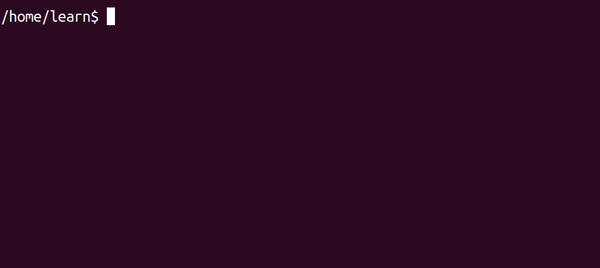

In [2]:
Image("sudo.gif")

The output of the last command not only confirms that the directory was created, but it also shows that its owner is not learn, but root. This is the expected result since the directory was created with the sudo command, which elevated the privileges of learn to those of the root user.

We might be wondering why, in order to use sudo, the user had to input their own password, instead of root's password, as it would happen on Windows. This is because we don't want people to just login as root as they please. So what's the password good for? The password may not prevent the user from damaging the system (there actually are other mechanisms in place for this, this is related to the permissions **s and t** that we mentioned earlier), but it will at least leave an audit trail. In addition to this, it's not just any user that can use sudo.

We may recall that when we ran id we got the following output.

/home/learn$ stat west

uid=1000(dq) gid=1000(dq) groups=1000(dq),27(sudo)

The last field indicates that dq belongs to a group called sudo. Only users in this group are allowed to use the sudo command. As we see below, learn is part of this group; because of this, learn was allowed to use sudo.

uid=1001(learn) gid=1001(learn) groups=1001(learn),27(sudo)

# Change Ownership

We've learned that access control depends not only on permissions, but also on ownership. And just as we've learned how to change permissions, we're going to learn how to change ownership of files.

To do this, we have at our disposal the commands chown (change owner) and chgrp (change group). We'll only learn about chown because it actually allows us to change the primary group in addition to the owner, so this is enough.

A typical usage of the command looks like the following.

chown [new_owner][:new_group] file...

Whenever we use square brackets ([]) when presenting a command, it means what's inside is optional (it's not necessary to be there for the command to work). In other words, it is an optional placeholder. The ellipsis (...) also have a meaning: the argument that precedes it can occur multiple times. In the example above, it means this command can be applied to several files.

Unsurprisingly, this command also requires sudo to be executed (even if we own the file), otherwise it would be very easy to exploit vulnerabilities. For instance, we could set the permissions of a malicious program to 777, change the ownership to root, and run it with our user.

An efficient use of sudo comes up in the context of history expansion. We learned that in interactive shells **!!** will run the last command. A very common situation is described as such: we just ran a command, only to realize that we need sudo access to run it. We can press the up arrow key, followed by the "Home" key, then type in sudo, followed by a space, and hit enter (or variations of this).

Or, we can type sudo !! and hit "Enter." Here's a gif displaying the alternative workflow with the command chown.

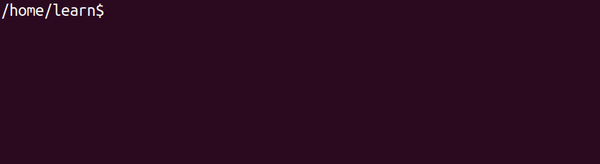

In [3]:
Image("history_expansion.gif")

In the gif below, we'll showcase the use of this command. More precisely, we'll:

* Check what files there are in the current directory and who owns them: ls -l.
* Change both the ownership and the group of file1: sudo chown dq:dataquest file1.
* Change the ownership of file2 while maintaining its group: sudo chown dq file2.
* Change the group of file3 while maintaining its ownership: sudo chown :dataquest file3.
* Check the changes we've made: ls -l.

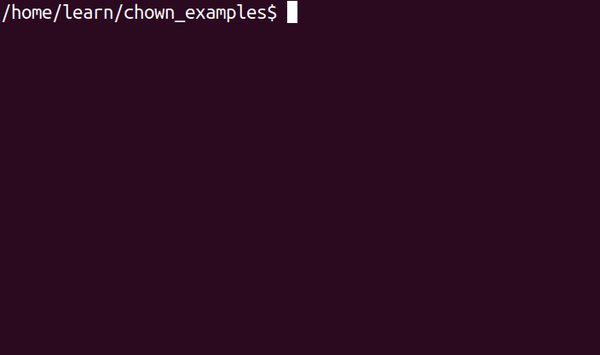

In [4]:
Image("chown.gif")

We may have noticed that we only had to input the password once. That's because sudo will cache the credentials for 15 minutes (by default).